In [1]:
from nsepy import get_history as gh
import datetime as dt

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [3]:
start = dt.datetime(2015,1,1)
end = dt.datetime(2020,12,31)
stk_data = gh(symbol='BHEL',start=start,end=end)

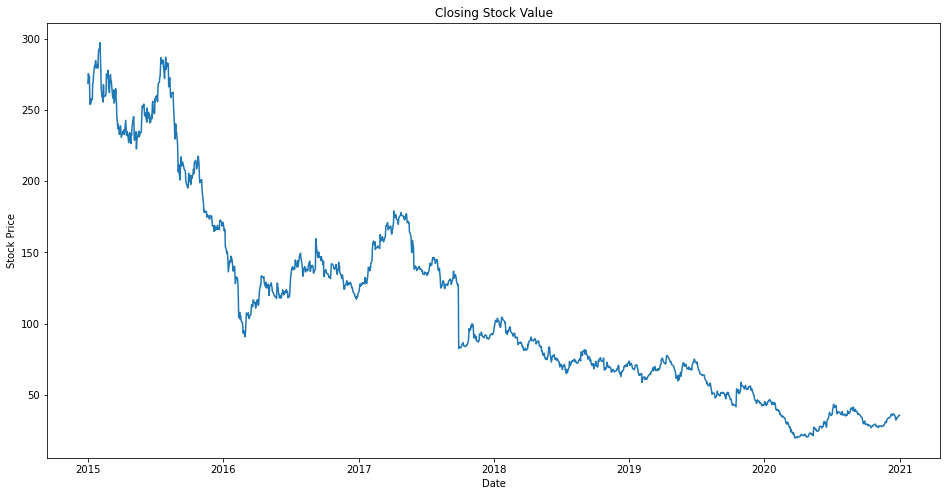

In [4]:
plt.figure(figsize=(16,8))
plt.plot(stk_data['Close'])
plt.title('Closing Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [5]:
stk_data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,BHEL,EQ,265.25,265.60,269.95,263.55,269.55,268.55,267.79,3129379,8.380089e+13,33458,566180,0.1809
2015-01-02,BHEL,EQ,268.55,269.40,276.95,269.00,275.75,275.30,274.47,4117859,1.130209e+14,36826,1179384,0.2864
2015-01-05,BHEL,EQ,275.30,276.00,278.40,270.10,273.50,273.40,273.85,3041992,8.330367e+13,31682,650841,0.2140
2015-01-06,BHEL,EQ,273.40,270.90,271.00,259.50,260.35,260.95,265.28,3784332,1.003923e+14,62360,1623906,0.4291
2015-01-07,BHEL,EQ,260.95,259.65,260.95,250.00,254.70,253.85,254.35,4520782,1.149855e+14,59031,1658162,0.3668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,BHEL,EQ,33.95,34.30,34.55,33.60,33.75,33.80,34.08,29009900,9.886035e+13,37195,5517406,0.1902
2020-12-28,BHEL,EQ,33.80,34.00,35.50,33.90,35.20,35.25,34.85,41052655,1.430838e+14,51780,8591170,0.2093
2020-12-29,BHEL,EQ,35.25,35.50,35.75,34.30,35.60,35.40,35.08,38681074,1.356948e+14,53086,7366108,0.1904


In [6]:
type(stk_data)

pandas.core.frame.DataFrame

In [7]:
stk_data.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1.486000e+03,1.486000e+03,1486.000000,1.486000e+03,1486.000000
mean,111.698957,111.875202,113.610935,109.809152,111.533647,111.544616,111.707995,1.463041e+07,9.670370e+13,39931.524899,3.912456e+06,0.297755
std,68.890548,68.934847,69.939395,67.700513,68.804805,68.803164,68.818502,2.397824e+07,9.679498e+13,30229.041821,5.618924e+06,0.098670
min,19.850000,20.000000,20.200000,18.400000,19.900000,19.850000,19.690000,5.464520e+05,6.548328e+12,4123.000000,2.439670e+05,0.090000
25%,62.337500,62.350000,63.250000,61.500000,62.212500,62.262500,62.332500,4.032904e+06,5.137859e+13,23866.250000,1.154803e+06,0.227150
50%,91.475000,91.425000,92.775000,90.125000,91.375000,91.375000,91.560000,7.131370e+06,6.963082e+13,32009.000000,2.176158e+06,0.283050
75%,142.987500,143.375000,145.500000,140.537500,142.537500,142.775000,143.012500,1.449740e+07,1.061882e+14,45794.750000,4.410619e+06,0.353675
max,297.100000,299.000000,300.000000,291.200000,297.450000,297.100000,295.350000,3.096866e+08,1.217201e+15,328364.000000,8.576266e+07,0.763600


In [8]:
stk_data['Date'] = stk_data.index
data2 = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data2['Date'] = stk_data['Date']
data2['Open'] = stk_data['Open']
data2['High'] = stk_data['High']
data2['Low'] = stk_data['Low']
data2['Close'] = stk_data['Close']

In [9]:
train_set = data2.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 1486):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [11]:
import tensorflow as tf
physical_devices=tf.config.list_physical_devices("GPU")

In [12]:
#print(physical_devices)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [17]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [18]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 15, batch_size = 32)

Epoch 1/15
45/45 [==============================] - 9s 60ms/step - loss: 0.0517
Epoch 2/15
45/45 [==============================] - 3s 59ms/step - loss: 0.0039
Epoch 3/15
45/45 [==============================] - 3s 61ms/step - loss: 0.0030
Epoch 4/15
45/45 [==============================] - 3s 61ms/step - loss: 0.0027
Epoch 5/15
45/45 [==============================] - 3s 61ms/step - loss: 0.0024
Epoch 6/15
45/45 [==============================] - 3s 66ms/step - loss: 0.0026
Epoch 7/15
45/45 [==============================] - 3s 60ms/step - loss: 0.0022
Epoch 8/15
45/45 [==============================] - 3s 59ms/step - loss: 0.0026
Epoch 9/15
45/45 [==============================] - 3s 57ms/step - loss: 0.0021
Epoch 10/15
45/45 [==============================] - 3s 61ms/step - loss: 0.0030
Epoch 11/15
45/45 [==============================] - 3s 56ms/step - loss: 0.0025
Epoch 12/15
45/45 [==============================] - 3s 59ms/step - loss: 0.0020
Epoch 13/15
45/45 [==================

In [19]:
testdataframe= gh(symbol='BHEL',start=dt.datetime(2021,1,1),end=dt.datetime(2021,12,31))
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']
real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((data2['Open'], testdata['Open']), axis = 0)

In [20]:
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)

In [21]:
len(inputs)

137

In [22]:
inputs = sc.transform(inputs)
X_test = []
for i in range(60,137):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [23]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

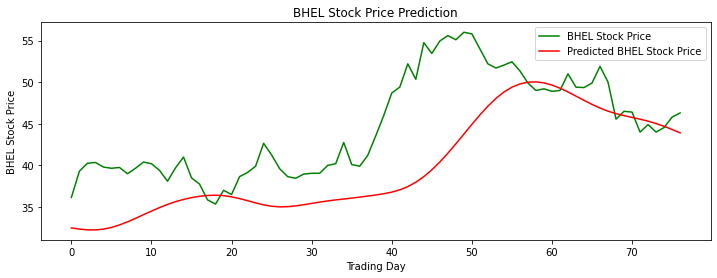

In [25]:
plt.figure(figsize=(12,4))
plt.plot(real_stock_price, color = 'green', label = 'BHEL Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted BHEL Stock Price')
plt.title('BHEL Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('BHEL Stock Price')
plt.legend()
plt.show()